<a href="https://colab.research.google.com/github/PhanDinhPhong/BTVN2/blob/main/btvn2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Dropout,Flatten
from sklearn.utils import shuffle
import cv2
import math
import csv
import pickle
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical 
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

l1 = 50
l2 = 40 
l3 = 20
z = []
for t1 in range(0,180,2):
  for t2 in range(0,180,2):
    t3 = 90 - t1 - t2
    x=l1*math.cos(math.radians(t1)) + l2*math.cos(math.radians(t1+t2)) + l3*math.cos(math.radians(t1+t2 +t3))
    y=l1*math.sin(math.radians(t1)) + l2*math.sin(math.radians(t1+t2)) + l3*math.sin(math.radians(t1+t2 +t3))
    
    t1 = t1/180
    t2 = t2/180
    t3 = (t3 + 180.0)/270.0
    x = (x + 110)/220
    y = (y + 110)/220
    z.append(np.array((t1,t2,t3,x,y)))

label = ['theta1', 'theta2','theta3', 'x', 'y']
with open('robot3bac.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(label)
    writer.writerows(z)
data = pd.read_csv('robot3bac.csv')
numpy_dataset = data.values
y=numpy_dataset[:,:3]
x=numpy_dataset[:,3:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
x_train.shape

(6480, 2)

In [ ]:
model = Sequential() 
model.add(Dense(256, activation='relu', input_shape = (2,))) 
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3))

model.compile(loss='mse', optimizer =Adam(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2)

Epoch 1/10
162/162 [==============================] - 2s 6ms/step - loss: 0.0364 - accuracy: 0.7473 - val_loss: 0.0082 - val_accuracy: 0.9398
Epoch 2/10
162/162 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9533 - val_loss: 0.0017 - val_accuracy: 0.9699
Epoch 3/10
162/162 [==============================] - 0s 3ms/step - loss: 5.2693e-04 - accuracy: 0.9892 - val_loss: 5.5467e-04 - val_accuracy: 0.9907
Epoch 4/10
162/162 [==============================] - 0s 3ms/step - loss: 2.7763e-04 - accuracy: 0.9882 - val_loss: 4.1237e-04 - val_accuracy: 1.0000
Epoch 5/10
162/162 [==============================] - 1s 3ms/step - loss: 2.1417e-04 - accuracy: 0.9888 - val_loss: 4.3683e-04 - val_accuracy: 1.0000
Epoch 6/10
162/162 [==============================] - 1s 3ms/step - loss: 2.4085e-04 - accuracy: 0.9888 - val_loss: 3.5116e-04 - val_accuracy: 1.0000
Epoch 7/10
162/162 [==============================] - 0s 3ms/step - loss: 1.7219e-04 - accuracy: 0.9929 - val_loss: 

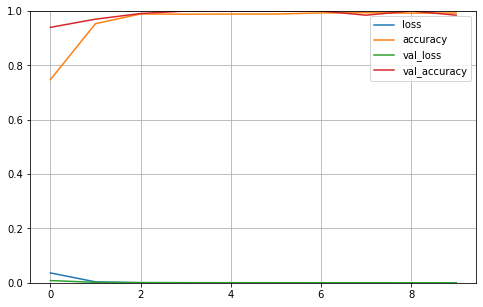

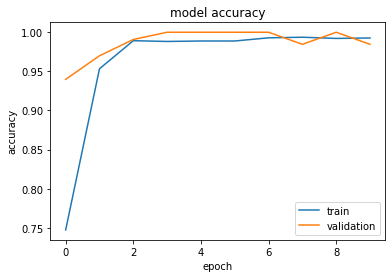

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
Px_testtrain = 60
Py_testtrain = 30
print(Px_testtrain,Py_testtrain)
ktra = model.predict([[Px_testtrain,Py_testtrain]])
t1 = ktra[0][0]
t2 = ktra[0][1]
t3 = ktra[0][2]
X = l1*math.cos(math.radians(t1)) +l2*math.cos(math.radians(t1+t2)) +l3*math.cos(math.radians(t1+t2+t3))
Y = l1*math.sin(math.radians(t1)) +l2*math.sin(math.radians(t1+t2)) +l3*math.sin(math.radians(t1+t2+t3))
print('x = ',X,'\n y = ',Y)
print('Góc t1 = ', t1,'\nGóc t2 = ', t2, '\nGóc t3 = ', t3)

60 30
x =  97.14267820683304 
 y =  32.1654635272765
Góc t1 =  17.025356 
Góc t2 =  -17.258072 
Góc t3 =  62.411625
